In [112]:
%store -r data_cat

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Por Canales de YouTube

#### 6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

In [114]:
data_cat.sort_values(by="channel_title").head()

,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable
13482,nDDfFws3BfA,"10,000 YEARS INTO THE FUTURE IN 10 MINUTES",#Mind Warehouse,27,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105),False,False,...,1649569,20713,2375,6354,2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/EoYkczo9I3RCf96Rv...",UCBR8-60-B28hp2BmDPdntcQ,Education,True
9676,ZktaGjw0kcU,PADAM URUVANA VIDHAM | #1 | 1 Kg Biriyani,1 Kg Biriyani,23,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129),False,False,...,71703,3075,632,381,2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
2278,7V6Z1uh3sqg,The startup | 1 Kg Biriyani | TVF Machi,1 Kg Biriyani,23,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129),False,False,...,65537,3518,236,200,2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
7769,SS_M2QGSJCA,Normal Day vs Periods | Part 2 | With English ...,1 Kg Biriyani,23,Jharkhand,23.800393,86.419986,POINT (86.41998572 23.80039349),False,False,...,269570,9758,582,505,4,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
6463,NTKBYlFO8Zo,Sunny vs Mia 😍 | 18+ | 1 Kg Biriyani,1 Kg Biriyani,23,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105),False,False,...,277791,21542,1022,1974,2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True


In [124]:
canales = data_cat[["channel_title", "trending_count"]]

In [125]:
canales

,channel_title,trending_count
0,Star Maa,2
1,Mahaa News,2
2,Nettv4u,3
3,Vijay Television,2
4,only ias,1
...,...,...
16804,Om Namoh Narayan,1
16805,Gemini TV,2
16806,Namma KFI,3
16807,Warangal Diaries,2


In [126]:
canales = canales.groupby(["channel_title"])["trending_count"].sum().reset_index()

In [92]:
canales

,channel_title,trending_count
0,#Mind Warehouse,2
1,1 Kg Biriyani,41
2,1 Minutes news,12
3,10 DEGREE INDIAN FACTS,35
4,10TVNewsChannel,23
...,...,...
1421,भक्ति,46
1422,वास्तु उपाय,7
1423,জীবন-সমস্যার সমাধান,1
1424,ഖല്‍ബാണ് ലീഗ്,2


In [127]:
canales_top = canales.sort_values(by="trending_count", ascending=False)

In [94]:
canales_top

,channel_title,trending_count
1275,VikatanTV,208
915,SAB TV,207
298,ETV Plus India,206
1378,etvteluguindia,205
1036,Study IQ education,203
...,...,...
1055,T-Series Marathi,1
506,Kannada,1
161,Bollywood Sins,1
512,Kannada Suddi,1


Como se puede observar los 5 canales que estan en tendencia con mayor frecuencia son: "VikatanTV", "SAB TV", "ETV Plus India", "etvteluguindia" y "Study IQ education"

In [129]:
canales_bot = canales.sort_values(by="trending_count")

In [130]:
canales_bot

,channel_title,trending_count
480,JackieMT 2nd,1
795,Pakkatv,1
1155,TeluguZ TV,1
308,Empty minds,1
1149,Telugu Trending,1
...,...,...
1036,Study IQ education,203
1378,etvteluguindia,205
298,ETV Plus India,206
915,SAB TV,207


Y los 5 canales que han estado en tendencia una sola vez son: "JackieMT 2nd","Pakkatv","TeluguZ TV","Empty minds"y"Telugu Trending"

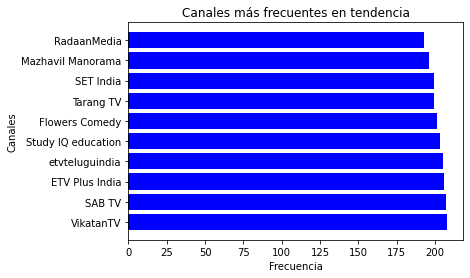

In [131]:
plt.barh(canales_top["channel_title"].head(10),canales_top["trending_count"].head(10), color="blue")
plt.ylabel('Canales')
plt.xlabel('Frecuencia en tendencia')
plt.title('Canales más frecuentes en tendencia')
plt.show()

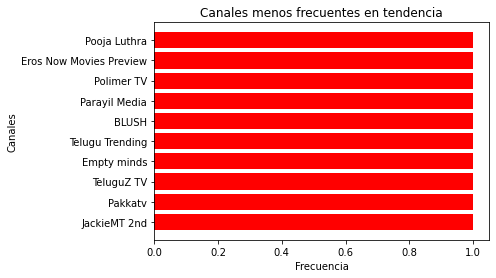

In [132]:
plt.barh(canales_bot["channel_title"].head(10),canales_bot["trending_count"].head(10), color="red")
plt.ylabel('Canales')
plt.xlabel('Frecuencia')
plt.title('Canales menos frecuentes en tendencia')
plt.show()